##  Ecommerce Analysis

### Bibliotecas

In [ ]:
import pandas as pd 
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
from scipy import stats

### Leitura dos dados

In [ ]:
ecommerce = pd.read_csv('/datasets/games.csv')
ecommerce.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Informações gerais dos dados

In [ ]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
# year_of_release deveria ser int



### Colocando as colunas em minúsculo

In [ ]:
ecommerce.columns = ecommerce.columns.str.lower()

print(ecommerce.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### Verificando valores ausentes

In [ ]:
missing_values = ecommerce.isna().sum()

print(missing_values)

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


### Tratando valores ausentes e convertendo dados 

In [ ]:
ecommerce['year_of_release'] = ecommerce['year_of_release'].astype('Int64')  # Convertendo para Int64
ecommerce['critic_score'] = ecommerce['critic_score'].astype('Int64')        # Convertendo para Int64
ecommerce['user_score'] = pd.to_numeric(ecommerce['user_score'], errors='coerce')  # Convertendo para float
ecommerce['rating'] = ecommerce['rating'].astype('category') 

print(ecommerce.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     28.96      3.77         8.45            76         8.0      E  
1      3.58      6.81         0.77          <NA>         NaN    NaN  
2     12.76      3.79         3.29            82         8.3      E  
3     10.93      3.28         2.95            80         8.0      E  
4      8.89     10.22         1.00          <NA>         NaN    NaN  


In [ ]:
ecommerce.info() # verificando a conversão

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  object  
 2   year_of_release  16446 non-null  Int64   
 3   genre            16713 non-null  object  
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   Int64   
 9   user_score       7590 non-null   float64 
 10  rating           9949 non-null   category
dtypes: Int64(2), category(1), float64(5), object(3)
memory usage: 1.3+ MB


### Descrevendo as colunas onde os tipos de dados foram alterados


### Consertando as colunas 

In [ ]:
ecommerce.reset_index(drop=True, inplace=True)

# Verificando os nomes das colunas
print("Colunas antes da correção:")
print(ecommerce.columns)

# Corrigindo
ecommerce.columns = [col.strip().lower().replace(" ", "_") for col in ecommerce.columns]

# Verificando as colunas novamente após a correção
print("\nColunas depois da correção:")
print(ecommerce.columns)


print("\nDataFrame corrigido:")
print(ecommerce.head())











Colunas antes da correção:
Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Colunas depois da correção:
Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

DataFrame corrigido:
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     28.96  

### Calculando o total de vendas

In [ ]:
ecommerce['total_sales'] = ecommerce['na_sales'] + ecommerce['eu_sales'] + ecommerce['jp_sales'] + ecommerce['other_sales']

print(ecommerce.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45            76         8.0      E   
1      3.58      6.81         0.77          <NA>         NaN    NaN   
2     12.76      3.79         3.29            82         8.3      E   
3     10.93      3.28         2.95            80         8.0      E   
4      8.89     10.22         1.00          <NA>         NaN    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4

In [ ]:
# só checando
total_vendas = ecommerce['na_sales'].sum() + ecommerce['eu_sales'].sum() + ecommerce['jp_sales'].sum() + ecommerce['other_sales'].sum()


print(f"O total de vendas em todas as regiões é: {total_vendas}")

O total de vendas em todas as regiões é: 8915.710000000001


### Conferindo jogos lançados por ano 

In [ ]:
jogos_por_ano = ecommerce['year_of_release'].value_counts().sort_index()

print("Número de jogos lançados por ano:")
print(jogos_por_ano)

Número de jogos lançados por ano:
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


In [ ]:
# Os dados por ano são significativos, em 2008 por exemplo, há uma grande diferença para os outros anos

### Variação de plataforma

Plataformas com maiores vendas totais:
          na_sales  eu_sales  jp_sales  other_sales  total_sales
platform                                                        
PS2         583.84    339.29    139.20       193.44      1255.77
X360        602.47    270.76     12.43        85.76       971.42
PS3         393.49    330.29     80.19       135.68       939.65
Wii         496.90    262.21     69.33        79.07       907.51
DS          382.40    188.89    175.57        59.26       806.12
PS          336.52    213.61    139.82        40.91       730.86
GBA         187.54     75.25     47.33         7.73       317.85
PS4         108.74    141.09     15.96        48.35       314.14
PSP         109.17     66.68     76.78        41.42       294.05
PC           94.53    142.44      0.17        22.38       259.52
3DS          83.49     61.48    100.67        13.36       259.00
XB          186.69     60.95      1.38         8.72       257.74
GB          114.32     47.82     85.12         8.20

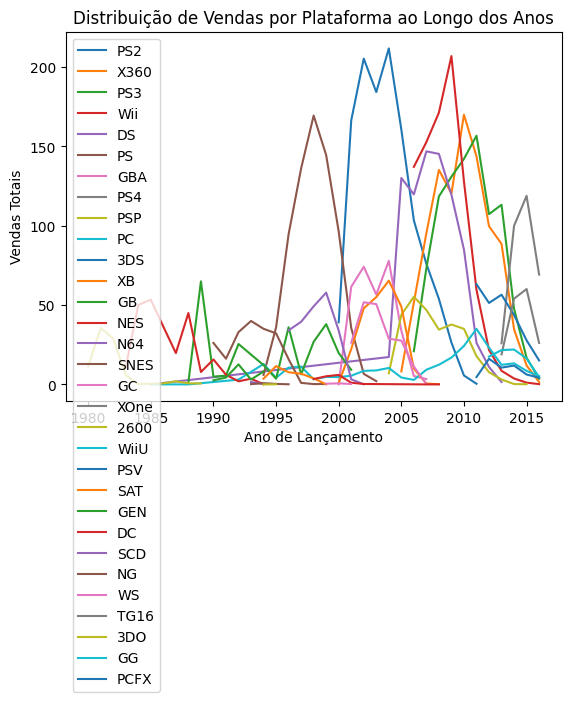

In [ ]:
# Calculando as vendas totais por plataforma
vendas_por_plataforma = ecommerce.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
vendas_por_plataforma['total_sales'] = vendas_por_plataforma.sum(axis=1)

# Classificando as plataformas por vendas totais
vendas_por_plataforma = vendas_por_plataforma.sort_values(by='total_sales', ascending=False)

# Exibindo as plataformas com maiores vendas totais
print("Plataformas com maiores vendas totais:")
print(vendas_por_plataforma)

# Para cada plataforma, criei uma distribuição de vendas por ano
import matplotlib.pyplot as plt

for plataforma in vendas_por_plataforma.index:
    dados_plataforma = ecommerce[ecommerce['platform'] == plataforma]
    vendas_por_ano = dados_plataforma.groupby('year_of_release')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().sum(axis=1)
    
    plt.plot(vendas_por_ano.index, vendas_por_ano.values, label=plataforma)

plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Totais')
plt.title('Distribuição de Vendas por Plataforma ao Longo dos Anos')
plt.legend()
plt.show()

In [ ]:
# Obtendo a lista de plataformas que não têm vendas no período mais recente
ultimos_anos = ecommerce['year_of_release'].max()
plataformas_desaparecidas = ecommerce[ecommerce['year_of_release'] < ultimos_anos].groupby('platform')['total_sales'].sum()
plataformas_desaparecidas = plataformas_desaparecidas[plataformas_desaparecidas > 0]


print("Plataformas que costumavam ser populares, mas não têm vendas no período mais recente:")
print(plataformas_desaparecidas)

NameError: name 'ecommerce' is not defined

In [ ]:
# Calculando o ano de lançamento mais recente e mais antigo para cada plataforma
anos_plataforma = ecommerce.groupby('platform')['year_of_release'].agg(['min', 'max'])

# Calculando a duração da presença de cada plataforma
anos_plataforma['duracao'] = anos_plataforma['max'] - anos_plataforma['min']

print("Duração de presença de cada plataforma:")
print(anos_plataforma)

Duração de presença de cada plataforma:
           min   max  duracao
platform                     
2600      1980  1989        9
3DO       1994  1995        1
3DS       2011  2016        5
DC        1998  2008       10
DS        1985  2013       28
GB        1988  2001       13
GBA       2000  2007        7
GC        2001  2007        6
GEN       1990  1994        4
GG        1992  1992        0
N64       1996  2002        6
NES       1983  1994       11
NG        1993  1996        3
PC        1985  2016       31
PCFX      1996  1996        0
PS        1994  2003        9
PS2       2000  2011       11
PS3       2006  2016       10
PS4       2013  2016        3
PSP       2004  2015       11
PSV       2011  2016        5
SAT       1994  1999        5
SCD       1993  1994        1
SNES      1990  1999        9
TG16      1995  1995        0
WS        1999  2001        2
Wii       2006  2016       10
WiiU      2012  2016        4
X360      2005  2016       11
XB        2000  2008        8


In [ ]:
print(ecommerce['year_of_release'].value_counts())

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64


In [ ]:
ecommerce_relevant = ecommerce[ecommerce['year_of_release'] > 2012]
print(ecommerce_relevant)

                                name platform  year_of_release         genre  \
16                Grand Theft Auto V      PS3             2013        Action   
23                Grand Theft Auto V     X360             2013        Action   
31         Call of Duty: Black Ops 3      PS4             2015       Shooter   
33               Pokemon X/Pokemon Y      3DS             2013  Role-Playing   
42                Grand Theft Auto V      PS4             2014        Action   
...                              ...      ...              ...           ...   
16703               Strawberry Nauts      PSV             2016     Adventure   
16707               Aiyoku no Eustia      PSV             2014          Misc   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

In [ ]:
platform_sales = ecommerce_relevant.groupby('platform')['total_sales'].sum()

# Ordenando plataformas por vendas totais
top_platforms = platform_sales.sort_values(ascending=False)
print(top_platforms)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64


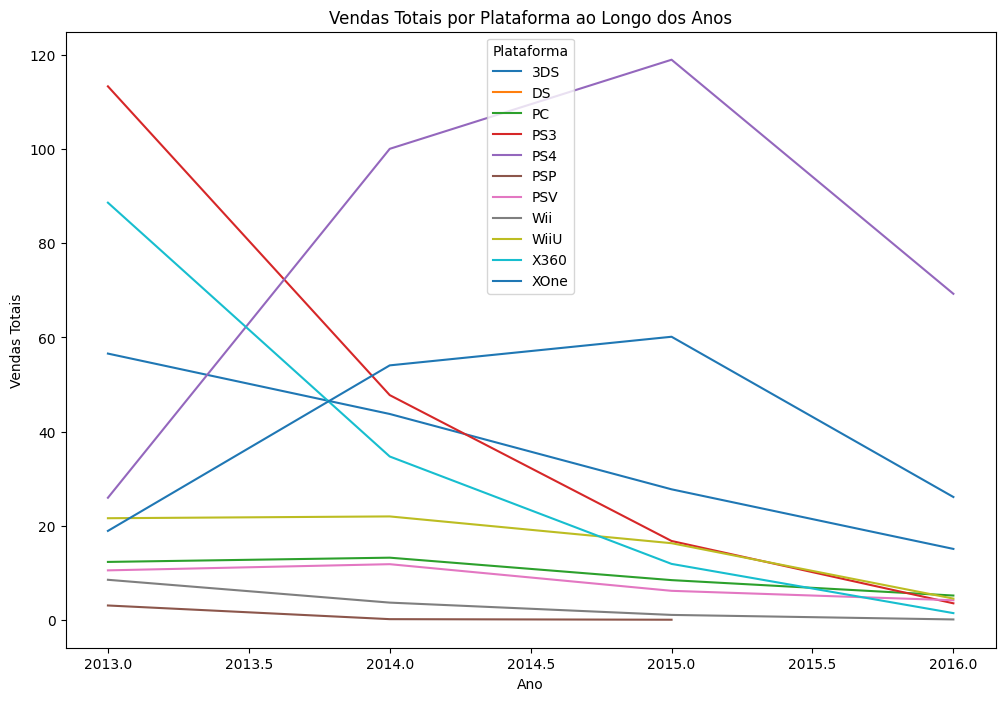

In [ ]:
import matplotlib.pyplot as plt

# Agrupando vendas por plataforma e ano
sales_by_platform_year = ecommerce_relevant.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Plotando vendas por plataforma ao longo dos anos
sales_by_platform_year.plot(figsize=(12, 8))
plt.title('Vendas Totais por Plataforma ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Vendas Totais')
plt.legend(title='Plataforma')
plt.show()

In [ ]:
# Calculando o intervalo de anos em que uma plataforma foi ativa
platform_active_period = ecommerce_relevant.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_active_period['active_duration'] = platform_active_period['max'] - platform_active_period['min']
print(platform_active_period)

           min   max  active_duration
platform                             
3DS       2013  2016                3
DS        2013  2013                0
PC        2013  2016                3
PS3       2013  2016                3
PS4       2013  2016                3
PSP       2013  2015                2
PSV       2013  2016                3
Wii       2013  2016                3
WiiU      2013  2016                3
X360      2013  2016                3
XOne      2013  2016                3


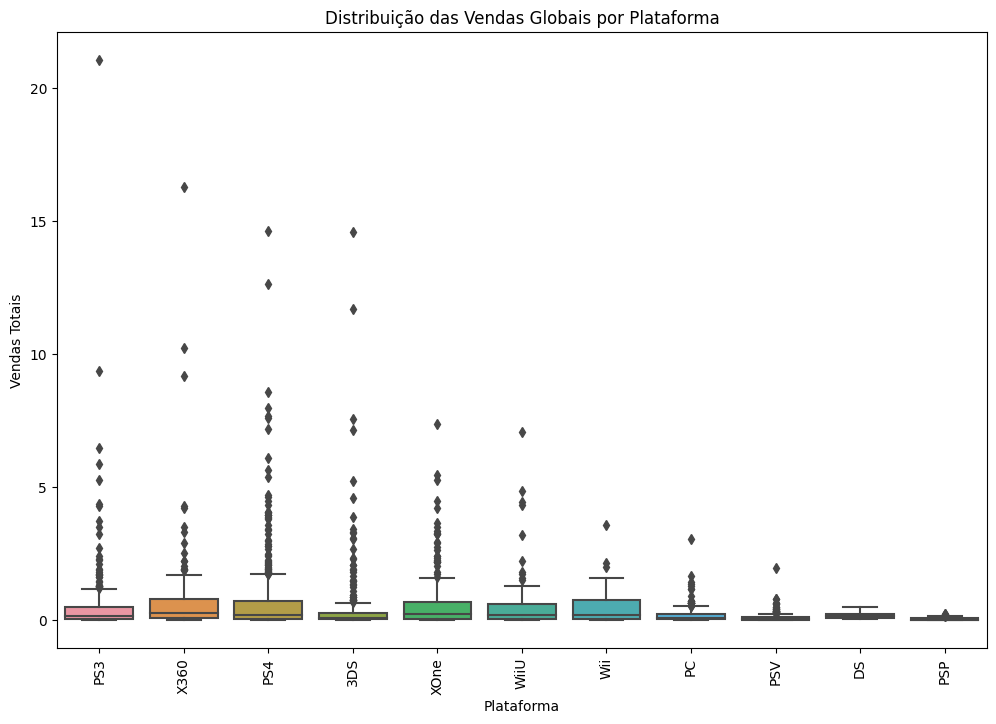

platform
3DS     0.472772
DS      0.192500
PC      0.208624
PS3     0.525884
PS4     0.801378
PSP     0.052239
PSV     0.092151
Wii     0.593913
WiiU    0.562000
X360    0.735484
XOne    0.645020
Name: total_sales, dtype: float64


In [ ]:
import seaborn as sns

# Diagrama de caixa para vendas globais por plataforma
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=ecommerce_relevant)
plt.xticks(rotation=90)
plt.title('Distribuição das Vendas Globais por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Totais')
plt.show()

# Vendas médias por plataforma
mean_sales_by_platform = ecommerce_relevant.groupby('platform')['total_sales'].mean()
print(mean_sales_by_platform)

In [ ]:
# Vendas médias e totais por plataforma
platform_sales_summary = ecommerce_relevant.groupby('platform').agg({
    'total_sales': ['mean', 'sum']
}).sort_values(('total_sales', 'sum'), ascending=False)

print("Resumo das Vendas por Plataforma:")
print(platform_sales_summary)

Resumo das Vendas por Plataforma:
         total_sales        
                mean     sum
platform                    
PS4         0.801378  314.14
PS3         0.525884  181.43
XOne        0.645020  159.32
3DS         0.472772  143.25
X360        0.735484  136.80
WiiU        0.562000   64.63
PC          0.208624   39.43
PSV         0.092151   32.99
Wii         0.593913   13.66
PSP         0.052239    3.50
DS          0.192500    1.54


In [ ]:
# Calculo de vendas totais e médias por gênero
genre_sales_summary = ecommerce_relevant.groupby('genre').agg({
    'total_sales': ['mean', 'sum']
}).sort_values(('total_sales', 'sum'), ascending=False)

print("Resumo das Vendas por Gênero:")
print(genre_sales_summary)

Resumo das Vendas por Gênero:
             total_sales        
                    mean     sum
genre                           
Action          0.420196  321.87
Shooter         1.245882  232.98
Sports          0.703972  150.65
Role-Playing    0.499623  145.89
Misc            0.405290   62.82
Platform        0.576081   42.63
Racing          0.469294   39.89
Fighting        0.441375   35.31
Adventure       0.096490   23.64
Simulation      0.350968   21.76
Strategy        0.180000   10.08
Puzzle          0.186471    3.17


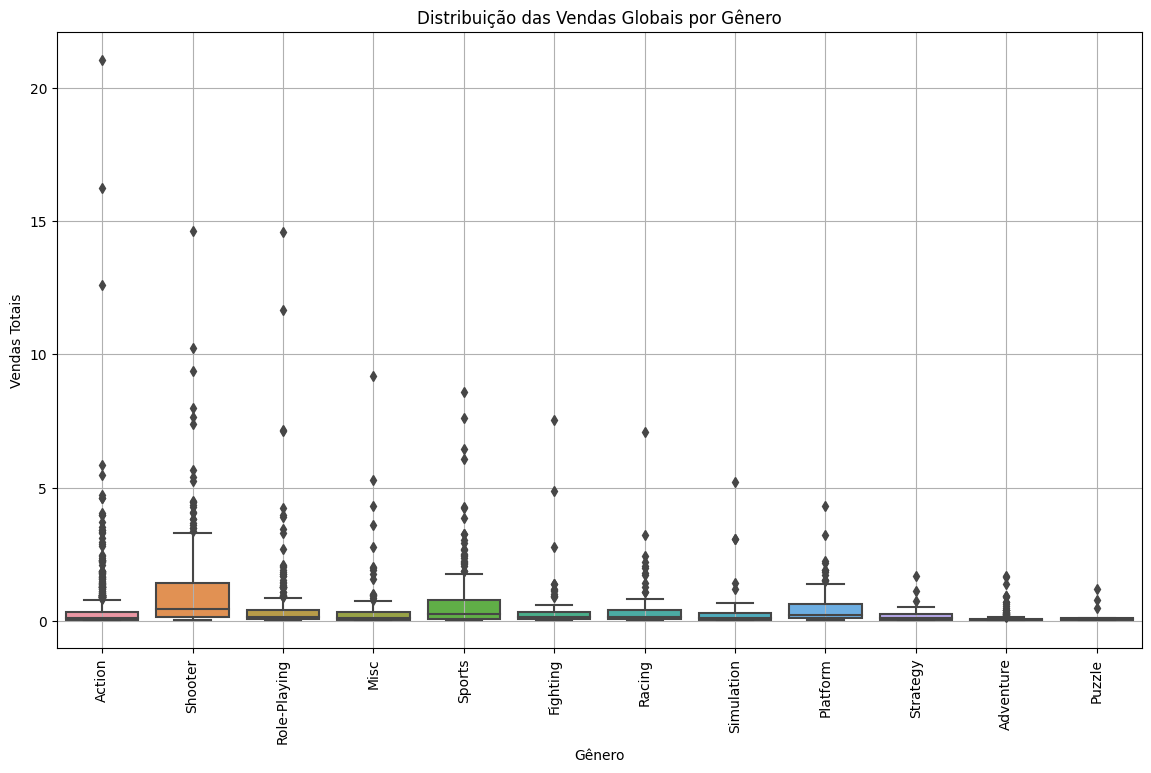

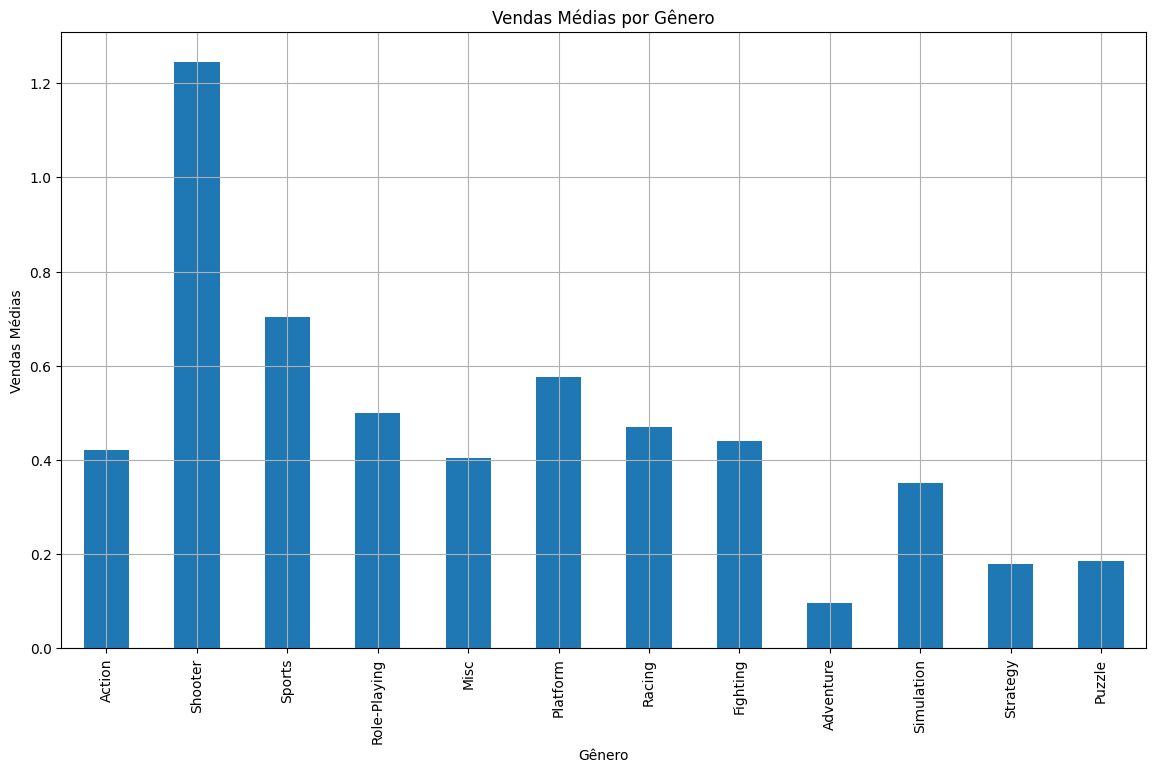

In [ ]:
# Diagrama de caixa para vendas globais por gênero
plt.figure(figsize=(14, 8))
sns.boxplot(x='genre', y='total_sales', data=ecommerce_relevant)
plt.xticks(rotation=90)
plt.title('Distribuição das Vendas Globais por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Vendas Totais')
plt.grid(True)
plt.show()

# Gráfico de barras para vendas médias por gênero
plt.figure(figsize=(14, 8))
genre_sales_summary['total_sales', 'mean'].plot(kind='bar')
plt.title('Vendas Médias por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Vendas Médias')
plt.grid(True)
plt.show()











### Criando um perfil de usuário para cada região

In [ ]:
print(ecommerce_relevant.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales'],
      dtype='object')


In [ ]:
platform_sales_by_region = {
    'NA': ecommerce_relevant.groupby('platform')['na_sales'].sum(),
    'EU': ecommerce_relevant.groupby('platform')['eu_sales'].sum(),
    'JP': ecommerce_relevant.groupby('platform')['jp_sales'].sum(),
    'Other': ecommerce_relevant.groupby('platform')['other_sales'].sum()
}

# Criando um DataFrame a partir dos resultados
platform_sales_df = pd.DataFrame(platform_sales_by_region).reset_index()
platform_sales_df.columns.name = None  # Removendo a nomenclatura das colunas
print(platform_sales_df)

   platform      NA      EU     JP  Other
0       3DS   38.20   30.96  67.81   6.28
1        DS    0.57    0.85   0.00   0.12
2        PC   11.11   25.36   0.00   2.96
3       PS3   63.50   67.81  23.35  26.77
4       PS4  108.74  141.09  15.96  48.35
5       PSP    0.00    0.17   3.29   0.04
6       PSV    5.04    6.10  18.59   3.26
7       Wii    6.56    5.93   0.05   1.12
8      WiiU   29.21   19.85  10.88   4.69
9      X360   81.66   42.52   0.51  12.11
10     XOne   93.12   51.59   0.34  14.27


In [ ]:
# Encontrando as cinco principais plataformas por região
top_5_platforms_by_region = {}
for region in ['NA', 'EU', 'JP', 'Other']:
    top_5_platforms_by_region[region] = platform_sales_df.nlargest(5, region).reset_index(drop=True)

# Exibindo os resultados
for region, df in top_5_platforms_by_region.items():
    print(f"Top 5 plataformas em {region}:")
    print(df)
    print()

Top 5 plataformas em NA:
  platform      NA      EU     JP  Other
0      PS4  108.74  141.09  15.96  48.35
1     XOne   93.12   51.59   0.34  14.27
2     X360   81.66   42.52   0.51  12.11
3      PS3   63.50   67.81  23.35  26.77
4      3DS   38.20   30.96  67.81   6.28

Top 5 plataformas em EU:
  platform      NA      EU     JP  Other
0      PS4  108.74  141.09  15.96  48.35
1      PS3   63.50   67.81  23.35  26.77
2     XOne   93.12   51.59   0.34  14.27
3     X360   81.66   42.52   0.51  12.11
4      3DS   38.20   30.96  67.81   6.28

Top 5 plataformas em JP:
  platform      NA      EU     JP  Other
0      3DS   38.20   30.96  67.81   6.28
1      PS3   63.50   67.81  23.35  26.77
2      PSV    5.04    6.10  18.59   3.26
3      PS4  108.74  141.09  15.96  48.35
4     WiiU   29.21   19.85  10.88   4.69

Top 5 plataformas em Other:
  platform      NA      EU     JP  Other
0      PS4  108.74  141.09  15.96  48.35
1      PS3   63.50   67.81  23.35  26.77
2     XOne   93.12   51.59   0.34

In [ ]:
# Agrupando por região e gênero e calculando vendas totais
genre_sales_by_region = {
    'NA': ecommerce_relevant.groupby('genre')['na_sales'].sum(),
    'EU': ecommerce_relevant.groupby('genre')['eu_sales'].sum(),
    'JP': ecommerce_relevant.groupby('genre')['jp_sales'].sum(),
    'Other': ecommerce_relevant.groupby('genre')['other_sales'].sum()
}

# Encontrando os cinco principais gêneros por região
top_5_genres_by_region = {}
for region, series in genre_sales_by_region.items():
    top_5_genres_by_region[region] = series.nlargest(5).reset_index(name='total_sales')

# Exibindo os resultados
for region, df in top_5_genres_by_region.items():
    print(f"\nTop 5 gêneros em {region}:")
    print(df)


Top 5 gêneros em NA:
          genre  total_sales
0        Action       126.05
1       Shooter       109.74
2        Sports        65.27
3  Role-Playing        46.40
4          Misc        27.49

Top 5 gêneros em EU:
          genre  total_sales
0        Action       118.13
1       Shooter        87.86
2        Sports        60.52
3  Role-Playing        36.97
4        Racing        20.19

Top 5 gêneros em JP:
          genre  total_sales
0  Role-Playing        51.04
1        Action        40.49
2          Misc         9.20
3      Fighting         7.65
4       Shooter         6.61

Top 5 gêneros em Other:
          genre  total_sales
0        Action        37.20
1       Shooter        28.77
2        Sports        19.45
3  Role-Playing        11.48
4          Misc         6.09


In [ ]:
# Calculando vendas totais por classificação do ESRB em cada região
rating_sales_by_region = {
    'NA': ecommerce_relevant.groupby('rating')['na_sales'].sum(),
    'EU': ecommerce_relevant.groupby('rating')['eu_sales'].sum(),
    'JP': ecommerce_relevant.groupby('rating')['jp_sales'].sum(),
    'Other': ecommerce_relevant.groupby('rating')['other_sales'].sum()
}

# Criando DataFrames a partir dos resultados
rating_sales_df = {region: pd.DataFrame(sales).reset_index() for region, sales in rating_sales_by_region.items()}

# Exibindo os resultados
for region, df in rating_sales_df.items():
    print(f"Vendas totais por classificação do ESRB em {region}:")
    print(df)
    print()

Vendas totais por classificação do ESRB em NA:
  rating  na_sales
0     AO      0.00
1      E     79.05
2   E10+     54.24
3     EC      0.00
4    K-A      0.00
5      M    165.21
6     RP      0.00
7      T     49.79

Vendas totais por classificação do ESRB em EU:
  rating  eu_sales
0     AO      0.00
1      E     83.36
2   E10+     42.69
3     EC      0.00
4    K-A      0.00
5      M    145.32
6     RP      0.00
7      T     41.95

Vendas totais por classificação do ESRB em JP:
  rating  jp_sales
0     AO      0.00
1      E     15.14
2   E10+      5.89
3     EC      0.00
4    K-A      0.00
5      M     14.11
6     RP      0.00
7      T     20.59

Vendas totais por classificação do ESRB em Other:
  rating  other_sales
0     AO         0.00
1      E        22.61
2   E10+        12.57
3     EC         0.00
4    K-A         0.00
5      M        47.04
6     RP         0.00
7      T        14.29



### Testando as hipóteses

In [ ]:
from scipy import stats as st

xbox_games = ecommerce[ecommerce['platform'] == 'XOne']['user_score'].dropna()
pc_games = ecommerce[ecommerce['platform'] == 'PC']['user_score'].dropna()

results = st.ttest_ind(xbox_games, pc_games)

print('Valor-p:', results.pvalue)

alpha = 0.05

if results.pvalue < alpha:
    print('Rejeitamos a hipótese nula: As receitas médias dos usuários dos planos XOne e PC são diferentes.')
else:
    print('Não podemos rejeitar a hipótese nula.')


Valor-p: 1.3896435533548819e-05
Rejeitamos a hipótese nula: As receitas médias dos usuários dos planos XOne e PC são diferentes.


In [ ]:
action_rating = np.var(xbox_games, ddof=1)
pc_rating = np.var(pc_games, ddof=1)

# Verificar a razão das variâncias
ratio_variance = action_rating / pc_rating

if 0.5 < ratio_variance < 2:
    print("As variâncias são aproximadamente iguais.")
    equal_var = True
else:
    print("As variâncias são diferentes.")
    equal_var = False

# Realizar o teste t usando as amostras
results = st.ttest_ind(xbox_one_scores, pc_scores, equal_var=equal_var)

# Definir o nível de significância
alpha = 0.05

# Interpretar os resultados
if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula: há uma diferença significativa entre as médias das classificações.")
else:
    print("Não rejeitamos a hipótese nula: não há uma diferença significativa entre as médias das classificações.")


### Conclusão